# Interactive Data Visualization Techniques

In [2]:
# Install required libraries
!pip install plotly bokeh pandas numpy

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Always run this for Bokeh in Jupyter
output_notebook()

Loading BokehJS ...

## 1. Interactive Scatter Plot with Plotly

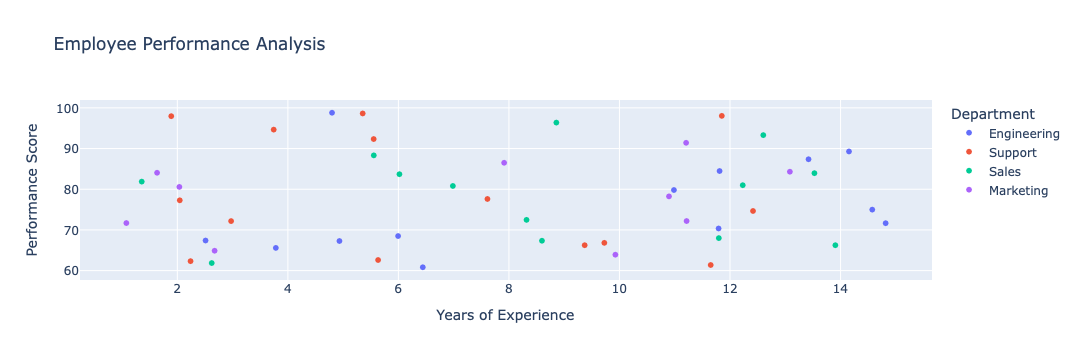

In [13]:
# Create sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Name': [f'Employee {i}' for i in range(1, 51)],
    'Performance Score': np.random.uniform(60, 100, 50),
    'Years of Experience': np.random.uniform(1, 15, 50),
    'Department': np.random.choice(['Sales', 'Marketing', 'Engineering', 'Support'], 50),
    'Bonus Percentage': np.random.uniform(2, 15, 50)
})

# Create interactive scatter plot
fig = px.scatter(
    df, 
    x='Years of Experience', 
    y='Performance Score', 
    color='Department',
    hover_name='Name',
    hover_data={
        'Department': True,
        'Bonus Percentage': ':.2f',
        'Years of Experience': ':.1f',
        'Performance Score': ':.2f'
    },
    title='Employee Performance Analysis'
)

# Customize hover template
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>' +
                  'Department: %{customdata[0]}<br>' +
                  'Years of Experience: %{x:.1f}<br>' +
                  'Performance Score: %{y:.2f}<br>' +
                  'Bonus Percentage: %{customdata[1]:.2f}%<extra></extra>'
)

# Show the plot
fig.show()

## 2. Interactive Bar Chart with Bokeh

In [16]:
# Aggregate data for bar chart
dept_performance = df.groupby('Department').agg({
    'Performance Score': 'mean',
    'Bonus Percentage': 'mean',
    'Years of Experience': 'mean'
}).reset_index()

# Prepare data source for Bokeh
source = ColumnDataSource(dept_performance)

# Create Bokeh figure
p = figure(
    x_range=dept_performance['Department'], 
    height=350, 
    title="Department Performance Overview",
    toolbar_location=None
)

# Add hover tool
hover = HoverTool(tooltips=[
    ("Department", "@Department"),
    ("Avg Performance Score", "@{Performance Score}{0.2f}"),
    ("Avg Bonus Percentage", "@{Bonus Percentage}{0.2f}%"),
    ("Avg Years of Experience", "@{Years of Experience}{0.1f}")
])
p.add_tools(hover)

# Create bar plot
p.vbar(
    x='Department', 
    top='Performance Score', 
    width=0.9, 
    source=source,
    line_color='white',
    fill_color='navy'
)

# Style the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = 'Department'
p.yaxis.axis_label = 'Average Performance Score'

# Show the plot
show(p)

## 3. Advanced Interaction: Clickable Chart with Dynamic Details



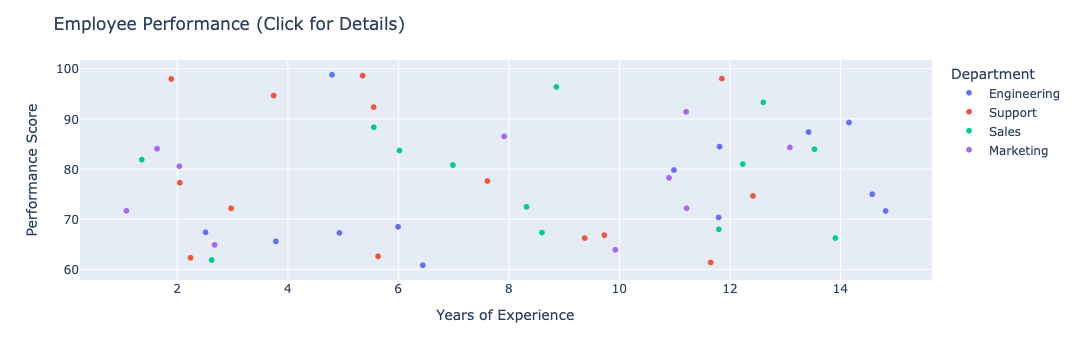

In [23]:
# Plotly scatter plot with click interactions
fig_click = px.scatter(
    df, 
    x='Years of Experience', 
    y='Performance Score', 
    color='Department',
    custom_data=['Name', 'Department', 'Bonus Percentage']
)

# Update layout to enable click events
fig_click.update_layout(
    title='Employee Performance (Click for Details)',
    clickmode='event+select'
)

# Customize hover and click templates
fig_click.update_traces(
    hovertemplate='<b>Click for Full Details</b><br>' +
                  'Years of Experience: %{x:.1f}<br>' +
                  'Performance Score: %{y:.2f}<extra></extra>',
    
)

# Show the plot
fig_click.show()